<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

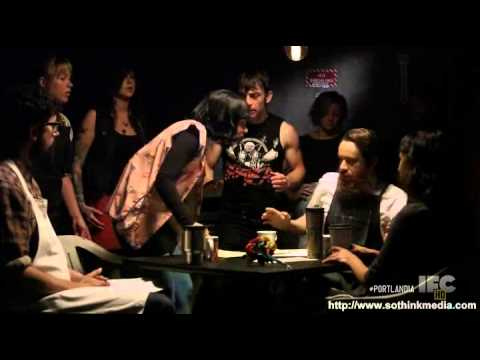

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\julio\\Desktop\\Lambda\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [158]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [159]:
# Start here 
import spacy
from spacy.tokenizer import Tokenizer
import re
from collections import Counter
import squarify
import matplotlib.pyplot as plt

In [160]:
dates = []
for text in shops['full_review_text']:
    dates.append(re.findall(r'\b[0-3]?[0-9]/[0-3]?[0-9]/(?:[0-9]{2})?[0-9]{2}\b', text)[0])
    
shops['dates'] = dates
shops

,coffee_shop_name,full_review_text,star_rating,dates
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,11/25/2016
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,12/2/2016
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,11/30/2016
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,11/25/2016
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,12/3/2016
...,...,...,...,...
7611,The Steeping Room,2/19/2015 I actually step into this restauran...,4.0 star rating,2/19/2015
7612,The Steeping Room,"1/21/2016 Ok, The Steeping Room IS awesome. H...",5.0 star rating,1/21/2016
7613,The Steeping Room,"4/30/2015 Loved coming here for tea, and the ...",4.0 star rating,4/30/2015
7614,The Steeping Room,8/2/2015 The food is just average. The booths...,3.0 star rating,8/2/2015


In [161]:
nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [162]:
tokens = []
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = []
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())
            
    tokens.append(doc_tokens)
    
shops['spacy_tokens'] = tokens
shops['spacy_tokens'].head()

0    [ , 11/25/2016, 1, check-in, love, love, loved...
1    [ , 12/2/2016, listed, date, night:, austin,, ...
2    [ , 11/30/2016, 1, check-in, listed, brunch, s...
3    [ , 11/25/2016, cool, decor!, good, drinks, ni...
4    [ , 12/3/2016, 1, check-in, located, northcros...
Name: spacy_tokens, dtype: object

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [168]:
word_counts = Counter()
shops['spacy_tokens'].apply(lambda x: word_counts.update(x))
word_counts.most_common(10)

[(' ', 22606),
 ('coffee', 8058),
 ('place', 4264),
 ('great', 3250),
 ("it's", 3117),
 ('like', 2902),
 ('good', 2779),
 ('1', 2035),
 ('check-in', 1961),
 ('love', 1806)]

In [169]:
def count(docs):
    ''' This function takes a list of tokenzied documents as input and returns
    a dataframe with
    
    # Arguments docs: list, tokenized list of documents
    
    # Returns wc: dataframe,
    '''
    
    word_counts = Counter()
    appears_in = Counter()
    
    total_docs = len(docs)
    
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))
        
    temp = zip(word_counts.keys(), word_counts.values())
    
    wc = pd.DataFrame(temp, columns = ['word', 'count'])
    
    wc['rank'] = wc['count'].rank(method="first", ascending=False)
    total =wc['count'].sum()
    
    wc['pct_total'] = wc['count'].apply(lambda x: x/total)
    
    wc = wc.sort_values(by="rank")
    wc['cul_pct_total'] = wc['pct_total'].cumsum()
    
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')
    
    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x/total_docs)
    
    return wc.sort_values(by='rank')

In [165]:
word_count = count(shops['spacy_tokens'])
print(word_count.shape)
word_count.head(20)

(40396, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
12,,7616,22606,1.0,0.053592,0.053592,1.000000
15,coffee,4210,8058,2.0,0.019103,0.072695,0.552784
98,place,3029,4264,3.0,0.010109,0.082803,0.397715
149,great,2438,3250,4.0,0.007705,0.090508,0.320116
251,it's,2061,3117,5.0,0.007389,0.097897,0.270614
174,like,2034,2902,6.0,0.006880,0.104777,0.267069
183,good,2084,2779,7.0,0.006588,0.111365,0.273634
43,1,1998,2035,8.0,0.004824,0.116190,0.262342
8,check-in,1957,1961,9.0,0.004649,0.120839,0.256959
18,love,1434,1806,10.0,0.004281,0.125120,0.188288


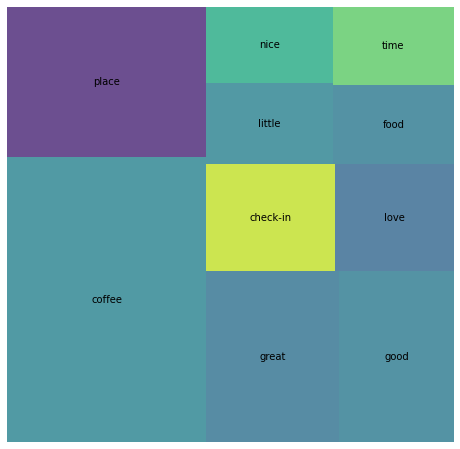

In [128]:
wc_top20 = word_count[word_count['rank'] <= 10]
plt.figure(figsize=(8,8))
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'],alpha =.8)
plt.axis('off')
plt.show()
# need to get rid of these useless words

In [170]:
STOP_WORDS = nlp.Defaults.stop_words.union(["1","like","it's","i'm","i've","don't"," ",'-'])

In [171]:
tokens = []
for doc in tokenizer.pipe(shops['full_review_text'],batch_size = 500):
    
    doc_tokens = []
    for token in doc:
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
    tokens.append(doc_tokens)
    
shops['spacy_token_v2'] = tokens

In [172]:
word_count = count(shops['spacy_token_v2'])
word_count.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
14,coffee,4210,8058,1.0,0.020746,0.020746,0.552784
97,place,3029,4264,2.0,0.010978,0.031724,0.397715
148,great,2438,3250,3.0,0.008367,0.040091,0.320116
181,good,2084,2779,4.0,0.007155,0.047246,0.273634
8,check-in,1957,1961,5.0,0.005049,0.052294,0.256959


In [173]:
# creating two columns to distinguish the ratings: 1-3 = bad, 4-5 = good 
shops['bad_shops'] = shops['star_rating'].str.contains('1.0 star rating|2.0 star rating|3.0 star rating', case=False)
shops['good_shops'] = shops['star_rating'].str.contains('4.0 star rating|5.0 star rating', case=False)

In [174]:
word_count.tail()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
40477,actuality.,1,1,40478.0,0.000003,0.999990,0.000131
40476,crass.,1,1,40479.0,0.000003,0.999992,0.000131
40478,restrictions.,1,1,40480.0,0.000003,0.999995,0.000131
40480,"specially,",1,1,40481.0,0.000003,0.999997,0.000131
40481,"digestion,",1,1,40482.0,0.000003,1.000000,0.000131


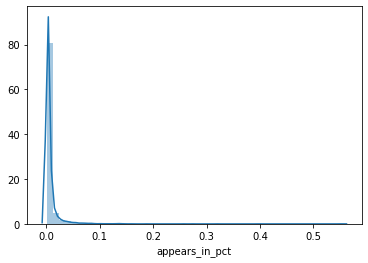

In [176]:
# statisitical trimming off of any word that show up 0.001% of the time
import seaborn as sns
word_count = word_count[word_count['appears_in_pct'] >= 0.001]
sns.distplot(word_count['appears_in_pct']);

In [177]:
# lemmatization
def get_lemmas(text):
    
    doc = nlp(text)
    lemmas = []
    for token in doc:
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != "PRON"):
            lemmas.append(token.lemma_)
            
    return lemmas

In [178]:
from tqdm import tqdm
tqdm.pandas()
shops['lemmas'] = shops['full_review_text'].progress_apply(get_lemmas)
shops['lemmas'].head()

C:\Users\julio\Anaconda3\envs\NLP\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████████████████████████████████████████████████████████████████████████| 7616/7616 [02:07<00:00, 59.64it/s]


0    [ , 11/25/2016, 1, check, Love, love, love, at...
1    [ , 12/2/2016, list, Date, Night, Austin, Ambi...
2    [ , 11/30/2016, 1, check, list, Brunch, Spots,...
3    [ , 11/25/2016, cool, decor, good, drink, nice...
4    [ , 12/3/2016, 1, check, locate, Northcross, m...
Name: lemmas, dtype: object

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


(16383, 7) (34367, 7)


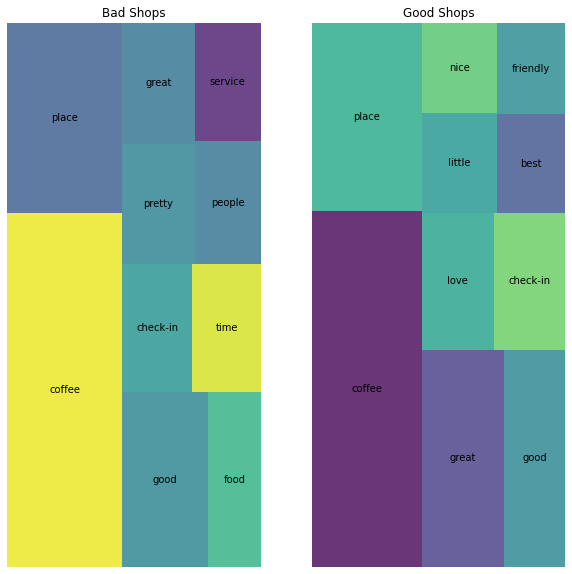

In [187]:
wc_bad_shops = count(shops[shops['bad_shops'] == 1]['spacy_token_v2'])
wc_good_shops = count(shops[shops['good_shops'] == 1]['spacy_token_v2'])
print(wc_bad_shops.shape, wc_good_shops.shape)

# top 10 words
wc_bad_top10 = wc_bad_shops[wc_bad_shops['rank'] <= 10]
wc_good_top10 = wc_good_shops[wc_good_shops['rank'] <= 10]

fig , axes = plt.subplots(1, 2, figsize=(10, 10))

axes[0].set_title("Bad Shops")
squarify.plot(sizes=wc_bad_top10['pct_total'],label=wc_bad_top10['word'],alpha=.8,ax=axes[0])
axes[0].axis('off')

axes[1].set_title("Good Shops")
squarify.plot(sizes=wc_good_top10['pct_total'],label=wc_good_top10['word'],alpha=.8,ax=axes[1])
axes[1].axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

